In [ ]:
#MNIST

In [ ]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

In [ ]:
#device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [ ]:
#hyperparameter

input_size = 784 #28*28
hidden_size = 500
num_classes = 10
num_epochs =2
batch_size = 100
learning_rate = 0.01


In [ ]:
#import data

train_dataset= torchvision.datasets.MNIST(root = './data', train = True, transform = transforms.ToTensor(), download = True)

test_dataset= torchvision.datasets.MNIST(root = './data', train = False, transform = transforms.ToTensor())

In [ ]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, batch_size = batch_size, shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset, batch_size = batch_size, shuffle = True)

In [ ]:
#examples
examples = iter(train_loader)
samples, lables = next(examples)
print(samples.shape, lables.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


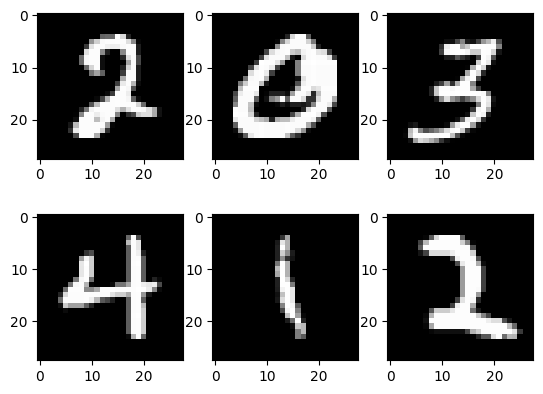

In [ ]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(samples[i][0], cmap = 'gray')
plt.show()


In [ ]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.input_size = input_size
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

model = NeuralNet(input_size, hidden_size, num_classes)

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr = learning_rate)


#training loop

n_total_steps = len(train_loader)

for epoch in range(num_epochs):
  for i, (images, labels) in enumerate(train_loader):
    images = images.reshape(-1, 28*28)

    #forward
    outputs = model(images)
    loss = criterion(outputs, labels)

    #backward
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

#test

with torch.no_grad():
  n_corr = 0
  n_samp = 0

  for images, labels in test_loader:
    images = images.reshape(-1,28*28)
    outputs = model(images)

    #value

    _, pred = torch.max(outputs, 1)
    n_samples += labels.shape[0]
    n_correct += (pred == labels).sum().item()

  acc = 100.0 * n_correct / n_samples
  print(f'Accuracy of the network on the 10000 test images: {acc} %')

Epoch [1/2], Step [100/600], Loss: 0.2757
Epoch [1/2], Step [200/600], Loss: 0.2667
Epoch [1/2], Step [300/600], Loss: 0.2439
Epoch [1/2], Step [400/600], Loss: 0.2043
Epoch [1/2], Step [500/600], Loss: 0.1417
Epoch [1/2], Step [600/600], Loss: 0.1893
Epoch [2/2], Step [100/600], Loss: 0.1322
Epoch [2/2], Step [200/600], Loss: 0.0819
Epoch [2/2], Step [300/600], Loss: 0.1206
Epoch [2/2], Step [400/600], Loss: 0.1113
Epoch [2/2], Step [500/600], Loss: 0.1555
Epoch [2/2], Step [600/600], Loss: 0.2091
Accuracy of the network on the 10000 test images: 97.04333333333334 %
